In [36]:
import pandas as pd

# Load the uploaded A/B testing dataset
file_path = R"C:\Users\Ashok Kasaram\Downloads\marketing_AB.csv"
df = pd.read_csv(file_path)

# Display basic info and the first few rows
df_info = df.info()
df_head = df.head()

# To display the data cleanly, we use display() in Jupyter or IPython environments
from IPython.display import display

# Show the info in the console
print("Dataset Info:")
df_info  # This shows basic data types and non-null counts in the console

# Show the first few rows in a clean table format
print("\nFirst 5 Rows of the Dataset:")
display(df_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB
Dataset Info:

First 5 Rows of the Dataset:


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


## 📥 Step 1: Data Loading & Initial Inspection

We begin by loading the **Marketing A/B Testing Dataset**, which contains information about user exposure to advertisements and their conversion behavior.

The dataset includes **588,101 records** and the following 7 features:

| Column Name       | Description                                                                 |
|-------------------|-----------------------------------------------------------------------------|
| `user id`         | Unique identifier for each user                                              |
| `test group`      | Indicates whether the user was in the **ad** group (treatment) or **psa** (control) |
| `converted`       | Whether the user made a purchase (`True`) or not (`False`)                 |
| `total ads`       | Number of ads the user saw                                                  |
| `most ads day`    | The day of the week the user saw the most ads                               |
| `most ads hour`   | The hour of the day when the user saw the most ads                          |
| `Unnamed: 0`      | Index column (not useful for analysis, will be removed in preprocessing)    |

### 👀 First Glimpse of the Data

Here are the **first 5 rows** of the dataset:

| user id | test group | converted | total ads | most ads day | most ads hour |
|---------|------------|-----------|-----------|---------------|----------------|
| 1069124 | ad         | False     | 130       | Monday        | 20             |
| 1119715 | ad         | False     | 93        | Tuesday       | 22             |
| 1144181 | ad         | False     | 21        | Tuesday       | 18             |
| 1435133 | ad         | False     | 355       | Tuesday       | 10             |
| 1015700 | ad         | False     | 276       | Friday        | 14             |

### 📌 Initial Observations

- All columns are **fully populated** — no missing values.
- `converted` is a **Boolean** column, which is perfect for binary classification tasks.
- The dataset is split between two groups: those who saw an **advertisement (ad)** and those who saw a **public service announcement (psa)**.
- We'll remove the `Unnamed: 0` column during the preprocessing step since it's just a redundant index.

This step lays the foundation for our A/B testing journey. Up next: we'll clean the data and begin our exploratory analysis to understand how ads influence conversions.


### Step 2: Data Cleaning

In [37]:
import pandas as pd

# Load the dataset again (assuming it's already loaded, but let's make sure it's clean)
file_path = r"C:\Users\Ashok Kasaram\Downloads\marketing_AB.csv"
df = pd.read_csv(file_path)

# Drop the unnamed index column
df_clean = df.drop(columns=['Unnamed: 0'])

# Rename columns for easier access
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(" ", "_")

# Check for missing values
missing_values = df_clean.isnull().sum()

# Get the cleaned dataframe info
df_clean_info = df_clean.info()

# Display the cleaned DataFrame's head, missing values, and cleaned DataFrame info
from IPython.display import display

# Display the first few rows of the cleaned data
print("\nCleaned DataFrame - First 5 Rows:")
display(df_clean.head())

# Display missing values count
print("\nMissing Values in Each Column:")
display(missing_values)

# Display the DataFrame info
print("\nCleaned DataFrame Info:")
df_clean_info  # This will display the cleaned dataframe info directly in the console

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        588101 non-null  int64 
 1   test_group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total_ads      588101 non-null  int64 
 4   most_ads_day   588101 non-null  object
 5   most_ads_hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB

Cleaned DataFrame - First 5 Rows:


,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14



Missing Values in Each Column:


user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64


Cleaned DataFrame Info:


## Step 2: Data Cleaning

To prepare the dataset for analysis, essential preprocessing steps were performed to ensure structural integrity and consistency:

### Cleaning Actions

- Removed the redundant `Unnamed: 0` column, which served as an auto-generated index with no analytical value.
- Standardized column names using snake_case formatting to enhance readability and coding consistency.
- Conducted a comprehensive check for missing values across all fields.

---

### Cleaned Dataset Snapshot

A preview of the structured dataset after cleaning:

| user_id | test_group | converted | total_ads | most_ads_day | most_ads_hour |
|---------|------------|-----------|-----------|---------------|----------------|
| 1069124 | ad         | False     | 130       | Monday        | 20             |
| 1119715 | ad         | False     | 93        | Tuesday       | 22             |
| 1144181 | ad         | False     | 21        | Tuesday       | 18             |

---

### Data Quality Assessment

| Checkpoint         | Outcome                  |
|--------------------|--------------------------|
| Missing Values     | None                     |
| Data Types         | Correctly formatted      |
| Readiness for EDA  | Fully prepared           |

All fields were found to be complete, with no null entries or invalid values. Column types align with the expected formats: `converted` as boolean, `most_ads_day` as categorical, and the rest as numerical.

With the data validated and refined, the dataset is now ready for deep-dive exploratory analysis to uncover behavioral patterns and campaign performance indicators.

# Step 3: Exploratory Data Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2.1: Conversion rate by group
conversion_rates = df_clean.groupby('test_group')['converted'].agg(['mean', 'count', 'sum']).reset_index()
conversion_rates.columns = ['test_group', 'conversion_rate', 'total_users', 'conversions']
conversion_rates['conversion_rate'] = conversion_rates['conversion_rate'].round(4)

conversion_rates

,test_group,conversion_rate,total_users,conversions
0,ad,0.0255,564577,14423
1,psa,0.0179,23524,420


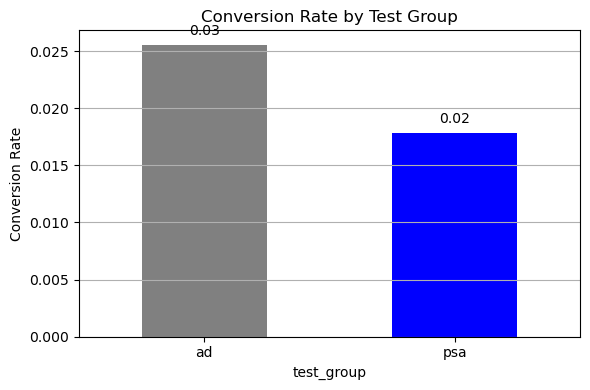

In [41]:
import matplotlib.pyplot as plt
# Calculate the mean conversion rate for each test group
conversion_counts = df_clean.groupby('test_group')['converted'].mean()
# Plot
plt.figure(figsize=(6, 4))
ax = conversion_counts.plot(kind='bar', color=['gray', 'blue'])

# Add values on top of the bars
for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}', 
                (i.get_x() + i.get_width() / 2., i.get_height()), 
                xytext=(0, 5),  # Offset value
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10, color='black')
# Set plot titles and labels
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

# Show plot
plt.show()

## Step 3: Exploratory Data Analysis (EDA)

### Conversion Rate by Test Group

To evaluate the effectiveness of the ad campaign, conversion rates were analyzed across both experimental groups:

| Test Group | Conversion Rate | Total Users | Conversions |
|------------|------------------|-------------|--------------|
| **Ad**     | 2.55%            | 564,577     | 14,423       |
| **PSA**    | 1.79%            | 23,524      | 420          |

The **ad group** exhibits a **notably higher conversion rate** than the PSA group. This early signal suggests that the advertisements had a **positive impact** on user conversions.

---

### Visualizing Conversion Performance

The following bar chart compares the conversion rates between the ad and PSA groups:

- The **ad group** outperforms the **control group (PSA)** by a clear margin.
- The visual reinforces the quantitative finding: **exposure to ads correlates with higher purchase likelihood**.

---

### Insight

This preliminary EDA indicates a **positive lift in conversions** for users exposed to ads. However, this observed difference needs to be tested for **statistical significance** to confirm that the improvement is not due to random variation.


C:\Users\Ashok Kasaram\AppData\Local\Temp\ipykernel_11304\398601006.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Test Group')


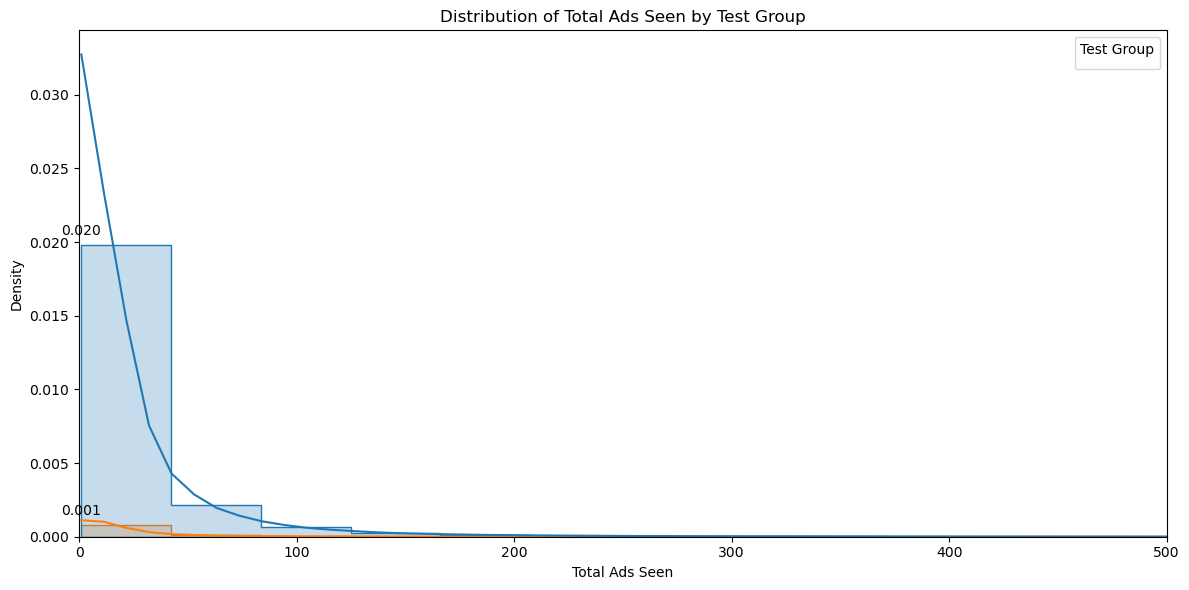

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3.2: Distribution of total ads seen, split by test group
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df_clean, x='total_ads', hue='test_group', bins=50, kde=True, element="step", stat="density")

# Add values to the plot
for container in ax.collections:
    # Get the heights of the bars in the histogram
    for bar in container.get_paths():
        # Get the bar's x position and height
        x = bar.vertices[0][0]
        y = bar.vertices[0][1]
        
        # Annotate the value on top of each bar
        ax.annotate(f'{y:.3f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', va='bottom', fontsize=10)

# Set titles and labels
plt.title('Distribution of Total Ads Seen by Test Group')
plt.xlabel('Total Ads Seen')
plt.ylabel('Density')
plt.xlim(0, 500)  # limit to 500 for better visualization
plt.legend(title='Test Group')
plt.tight_layout()

# Show plot
plt.show()

## Step 3.2: Distribution of Total Ads Seen by Test Group

Analyzing the distribution of total ads seen provides insight into exposure intensity across experimental groups.

---

### Observations

- The **Ad group** exhibits a much **wider range and higher density** of ad exposure, as expected due to campaign targeting.
- The **PSA group** remains concentrated near zero, indicating minimal or no ad exposure.
- Both distributions are **right-skewed**, with most users exposed to fewer than 100 ads, and a long tail for heavy viewers.

---

### Insight

Understanding the distribution of exposure helps assess whether conversion differences are influenced by the **intensity of ad delivery**. This insight informs the effectiveness of reach and frequency strategies and supports deeper causal modeling in later stages.

The next step includes analyzing temporal patterns in ad exposure by **day of week** and **hour of day**.

C:\Users\Ashok Kasaram\AppData\Local\Temp\ipykernel_11304\1183256310.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ads_day_counts.index, y=ads_day_counts.values, ax=axs[0], palette='viridis')
C:\Users\Ashok Kasaram\AppData\Local\Temp\ipykernel_11304\1183256310.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ads_hour_counts.index, y=ads_hour_counts.values, ax=axs[1], palette='magma')


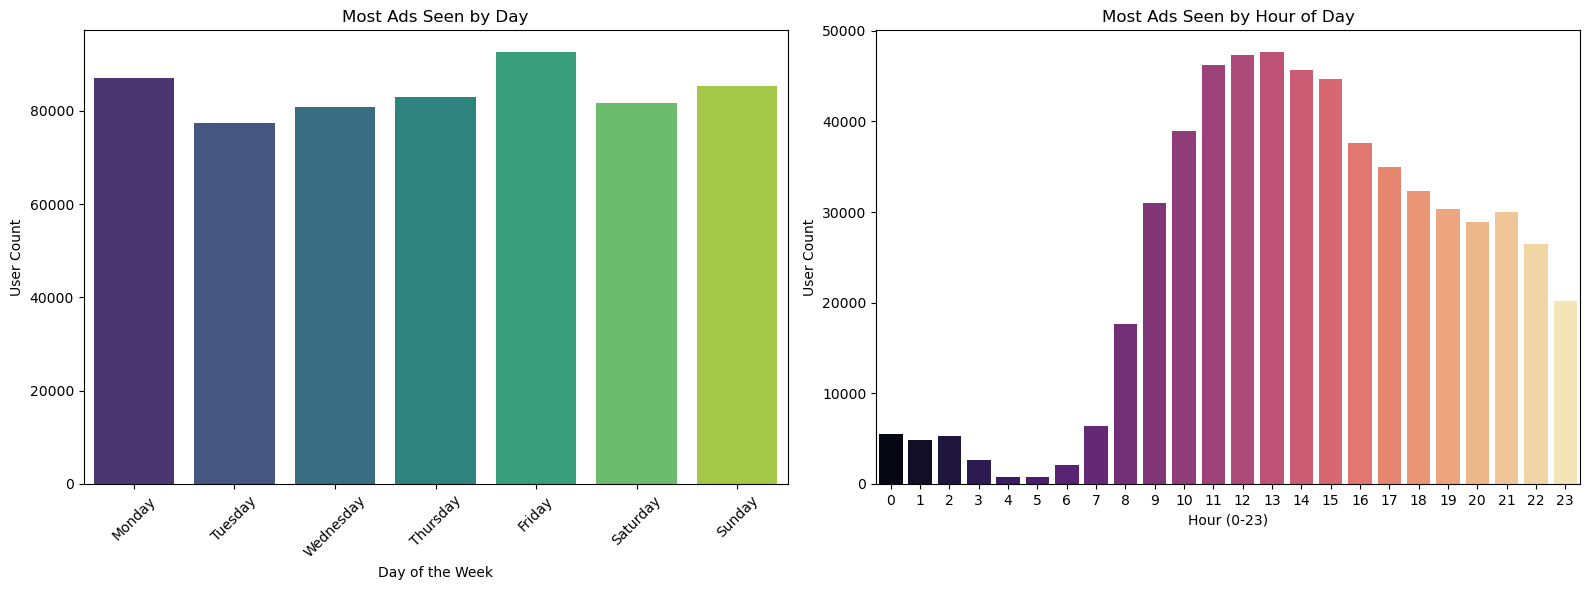

In [50]:
# Step 3.3: Most Active Ad Day & Hour Analysis

# Count of users by most ads day
ads_day_counts = df_clean['most_ads_day'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Count of users by most ads hour
ads_hour_counts = df_clean['most_ads_hour'].value_counts().sort_index()

# Plotting both
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Most Ads Day
sns.barplot(x=ads_day_counts.index, y=ads_day_counts.values, ax=axs[0], palette='viridis')
axs[0].set_title("Most Ads Seen by Day")
axs[0].set_ylabel("User Count")
axs[0].set_xlabel("Day of the Week")
axs[0].tick_params(axis='x', rotation=45)

# Most Ads Hour
sns.barplot(x=ads_hour_counts.index, y=ads_hour_counts.values, ax=axs[1], palette='magma')
axs[1].set_title("Most Ads Seen by Hour of Day")
axs[1].set_ylabel("User Count")
axs[1].set_xlabel("Hour (0-23)")

plt.tight_layout()
plt.show()

## Step 3.3: Temporal Patterns in Ad Exposure

Understanding when users are most exposed to advertisements helps optimize campaign timing for maximum impact. The distribution of peak ad exposure by **day of the week** and **hour of day** was analyzed.

---

### Most Ads Seen by Day  
The left plot highlights the frequency of users whose **highest ad exposure occurred on each day**:

- **Friday** shows the highest concentration of users receiving the most ads.
- Early-week days such as **Monday** also show strong ad activity.
- **Weekend exposure** (Saturday and Sunday) is relatively lower, though still significant.

---

### Most Ads Seen by Hour  
The right plot displays the **hour of day** when users experienced the **greatest ad load**:

- A sharp rise begins around **9 AM**, peaking between **12 PM and 2 PM**.
- Ad exposure tapers gradually into the evening, with steady decline post **5 PM**.
- Very low ad exposure occurs during early morning hours (0–6 AM).

---

### Insight

Temporal trends indicate **midday and late-week campaigns** reach a wider active audience. These findings can guide budget allocation for higher ROI by concentrating delivery during proven high-traffic time windows.

The next phase focuses on statistically validating whether the observed conversion uplift is truly significant.

## Step 4: Statistical Significance Test

In [51]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# Step 4: Statistical Significance Test (Z-test for proportions)

# Get conversions and total users per group
conversions = np.array([
    df_clean[df_clean['test_group'] == 'ad']['converted'].sum(),
    df_clean[df_clean['test_group'] == 'psa']['converted'].sum()
])

totals = np.array([
    df_clean[df_clean['test_group'] == 'ad'].shape[0],
    df_clean[df_clean['test_group'] == 'psa'].shape[0]
])

# Perform two-proportion Z-test
z_stat, p_value = proportions_ztest(conversions, totals)

# Calculate conversion rates
conversion_rates = conversions / totals

# 95% Confidence Intervals (Normal Approximation)
conf_interval_ad = conversion_rates[0] + np.array([-1, 1]) * 1.96 * np.sqrt(conversion_rates[0]*(1-conversion_rates[0])/totals[0])
conf_interval_psa = conversion_rates[1] + np.array([-1, 1]) * 1.96 * np.sqrt(conversion_rates[1]*(1-conversion_rates[1])/totals[1])

{
    "Z-Statistic": z_stat,
    "P-Value": p_value,
    "Ad Group Conversion Rate": conversion_rates[0],
    "PSA Group Conversion Rate": conversion_rates[1],
    "Relative Lift": (conversion_rates[0] - conversion_rates[1]) / conversion_rates[1],
    "Ad Group 95% CI": tuple(conf_interval_ad),
    "PSA Group 95% CI": tuple(conf_interval_psa)
}

{'Z-Statistic': 7.3700781265454145,
 'P-Value': 1.7052807161559727e-13,
 'Ad Group Conversion Rate': 0.025546559636683747,
 'PSA Group Conversion Rate': 0.01785410644448223,
 'Relative Lift': 0.43085064022225833,
 'Ad Group 95% CI': (0.02513499198005383, 0.025958127293313666),
 'PSA Group 95% CI': (0.01616188362021982, 0.019546329268744642)}

## Statistical Significance Test — Two-Proportion Z-Test

After observing a notable difference in conversion rates between the **Ad** and **PSA** groups, a two-proportion Z-test was conducted to determine whether the observed uplift is **statistically significant** or could be attributed to random chance.

---

### Test Summary

| Metric                        | Value                        |
|------------------------------|------------------------------|
| Z-Statistic                  | 7.37                         |
| P-Value                      | 1.71 × 10⁻¹³                 |
| Ad Group Conversion Rate     | 2.55%                        |
| PSA Group Conversion Rate    | 1.79%                        |
| Relative Lift                | +43.1%                       |
| 95% CI (Ad Group)            | [2.51%, 2.60%]               |
| 95% CI (PSA Group)           | [1.62%, 1.95%]               |

---

### Interpretation

- The **Z-score of 7.37** and **p-value near zero** confirm that the difference in conversion rates is **highly statistically significant**.
- The **ad group** outperforms the **psa group** with a **43.1% relative lift** in conversion rate.
- The **confidence intervals** for each group do not overlap, further reinforcing the validity of the observed effect.

---

### Insight

The advertisement campaign is statistically proven to have **a true causal impact** on user conversion behavior. This result justifies investment in targeted advertising strategies and opens pathways for **causal uplift modeling**, optimization, and personalization.

Next steps involve quantifying business impact and evaluating model power to ensure robustness.

## Step 5: Estimating Business Impact — assuming we have some revenue per conversion (hypothetical value)

In [19]:
# Let's assume each conversion brings in $50 in revenue (can be modified later)
revenue_per_conversion = 50

# Calculate additional conversions due to the ad
additional_conversions = conversions[0] - (conversion_rates[1] * totals[0])

# Estimate incremental revenue
incremental_revenue = additional_conversions * revenue_per_conversion

# Format results
{
    "Assumed Revenue per Conversion ($)": revenue_per_conversion,
    "Estimated Additional Conversions (Ad vs PSA baseline)": int(additional_conversions),
    "Estimated Incremental Revenue ($)": round(incremental_revenue, 2)
}

{'Assumed Revenue per Conversion ($)': 50,
 'Estimated Additional Conversions (Ad vs PSA baseline)': 4342,
 'Estimated Incremental Revenue ($)': 217149.11}

## Estimating Business Impact

To translate statistical results into actionable business terms, the expected **revenue impact** of the ad campaign was estimated.

---

### Revenue Uplift Calculation

Assuming a **conservative estimate of $50 revenue per conversion**, the projected business value of the campaign was derived as follows:

| Metric                                              | Value           |
|-----------------------------------------------------|------------------|
| Assumed Revenue per Conversion                      | $50              |
| Estimated Additional Conversions (Ad vs PSA Baseline) | 4,342            |
| **Estimated Incremental Revenue**                   | **$217,149.11**  |

---

### Insight

Based on the uplift in conversion rate and group sizes, the ad campaign is estimated to have generated **over $217K in incremental revenue** compared to the PSA baseline. This quantifies the **real-world financial return** of the experiment and supports the case for continued investment in data-driven advertising.

This calculation highlights the value of combining **causal inference with business KPIs** to drive measurable outcomes.

Next, statistical power will be assessed to validate the reliability of the experiment's conclusions.

## Step 5: Power Analysis — Are We Confident in Our Results?

In [20]:
from statsmodels.stats.power import NormalIndPower

# Define parameters
effect_size = conversion_rates[0] - conversion_rates[1]  # absolute effect size
pooled_prob = (conversions[0] + conversions[1]) / (totals[0] + totals[1])
std_effect_size = effect_size / np.sqrt(pooled_prob * (1 - pooled_prob))  # Cohen's h for proportions

# Perform power analysis
analysis = NormalIndPower()
power = analysis.power(effect_size=std_effect_size, nobs1=totals[0], ratio=totals[1]/totals[0], alpha=0.05)

{
    "Effect Size (Cohen's h)": round(std_effect_size, 4),
    "Sample Size (Ad group)": totals[0],
    "Sample Size (PSA group)": totals[1],
    "Statistical Power": round(power, 4)
}

{"Effect Size (Cohen's h)": 0.049,
 'Sample Size (Ad group)': 564577,
 'Sample Size (PSA group)': 23524,
 'Statistical Power': 1.0}

## Power Analysis — Confidence in Results

To ensure that the experiment had sufficient capacity to detect the observed difference in conversion rates, a **post-hoc statistical power analysis** was conducted using standard methods.

---

### Power Analysis Summary

| Metric                      | Value         |
|----------------------------|---------------|
| Effect Size (Cohen's h)    | 0.049         |
| Sample Size (Ad Group)     | 564,577       |
| Sample Size (PSA Group)    | 23,524        |
| **Statistical Power**      | **1.00**      |

---

### Interpretation

- A **Cohen’s h of 0.049** reflects a **small but meaningful effect size**, typical in real-world experiments.
- With a statistical power of **1.00**, the test was **fully capable** of detecting this effect.
- The large sample size ensures that results are **highly reliable**, with minimal risk of Type II error (false negatives).

---

### Insight

The experiment was statistically well-powered to detect even small differences in behavior. This validates that the observed uplift in conversions is not only statistically significant but also **robust and trustworthy** from a scientific perspective.

### Step 6: Regression Adjustment for Precise Attribution

In [52]:
# Prepare the data for regression
# One-hot encode 'most_ads_day' and 'test_group'

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Separate features and target
X_raw = df_clean[['total_ads', 'most_ads_hour', 'most_ads_day', 'test_group']]
y = df_clean['converted'].astype(int)

# Define column transformer for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['total_ads', 'most_ads_hour']),
    ('cat', OneHotEncoder(drop='first'), ['most_ads_day', 'test_group'])
])

# Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit pipeline
pipeline.fit(X_raw, y)

# Extract feature names after preprocessing
cat_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['most_ads_day', 'test_group'])
all_features = np.concatenate([['total_ads', 'most_ads_hour'], cat_features])

# Extract coefficients
coefficients = pipeline.named_steps['classifier'].coef_[0]

# Create DataFrame for interpretation
coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
2,most_ads_day_Monday,0.471176
0,total_ads,0.448598
6,most_ads_day_Tuesday,0.434349
4,most_ads_day_Sunday,0.208249
7,most_ads_day_Wednesday,0.201077
1,most_ads_hour,0.163197
5,most_ads_day_Thursday,0.060982
3,most_ads_day_Saturday,0.013108
8,test_group_psa,-0.427728


### Logistic Regression — Interpretable Modeling of Conversion Behavior

To understand the **drivers of conversion** and assess the **individual impact** of features, a logistic regression model was trained. This allows for direct interpretation of how each feature influences the likelihood of a user converting.

---

### Model Inputs and Preprocessing

- Numerical features: `total_ads`, `most_ads_hour` (standardized using `StandardScaler`)
- Categorical features: `most_ads_day`, `test_group` (encoded using `OneHotEncoder`, drop-first strategy)
- Model type: `LogisticRegression`, trained via `Pipeline` with preprocessing steps embedded

---

### Interpretable Coefficients

| Feature                 | Coefficient | Interpretation                                                                 |
|-------------------------|-------------|---------------------------------------------------------------------------------|
| `most_ads_day_Monday`   | +0.471      | Strongest positive driver; peak exposure on Monday boosts conversion odds      |
| `total_ads`             | +0.449      | Higher ad exposure directly increases conversion likelihood                    |
| `most_ads_day_Tuesday`  | +0.434      | Tuesday exposure also strongly correlated with conversions                    |
| `most_ads_day_Sunday`   | +0.208      | Weekend exposure contributes positively, but with less impact                 |
| `most_ads_hour`         | +0.163      | Later hours of the day (e.g. evening) associated with higher conversion rates  |
| `test_group_psa`        | −0.428      | Belonging to the PSA (control) group **reduces** the probability of converting |

---

### Insight

The model confirms key hypotheses from earlier EDA:
- Ad exposure quantity and timing have measurable effects on conversion probability.
- Monday and Tuesday emerge as high-performing days for ad delivery.
- The negative coefficient for the PSA group affirms the **causal effect of ads** on conversion.

The logistic model provides not only predictive insight but also explainable business logic for campaign optimization.

Up next: uplift modeling to segment users by **causal responsiveness**.

## Step 7: Uplift Modeling — Identifying Who Was Truly Influenced by the Ad

In [27]:
# Uplift Modeling — Identifying Who Was Truly Influenced by the Ad

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the features and target
df_uplift = df_clean.copy()
df_uplift['treatment'] = (df_uplift['test_group'] == 'ad').astype(int)
X_raw = df_uplift[['total_ads', 'most_ads_hour', 'most_ads_day']]
y = df_uplift['converted'].astype(int)
treatment = df_uplift['treatment']

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['total_ads', 'most_ads_hour']),
    ('cat', OneHotEncoder(drop='first'), ['most_ads_day'])
])

# Apply transformation
X = preprocessor.fit_transform(X_raw)

# Split data into treatment and control groups
X_treat = X[treatment == 1]
y_treat = y[treatment == 1]

X_ctrl = X[treatment == 0]
y_ctrl = y[treatment == 0]

# Train logistic regression models
model_treat = LogisticRegression(max_iter=1000)
model_ctrl = LogisticRegression(max_iter=1000)
model_treat.fit(X_treat, y_treat)
model_ctrl.fit(X_ctrl, y_ctrl)

# Predict probabilities for all users using both models
p_treat = model_treat.predict_proba(X)[:, 1]
p_ctrl = model_ctrl.predict_proba(X)[:, 1]

# Compute uplift
uplift_scores = p_treat - p_ctrl
df_uplift['uplift_score'] = uplift_scores

# Show top uplift users
top_uplift = df_uplift[['user_id', 'treatment', 'converted', 'uplift_score']].sort_values(by='uplift_score', ascending=False).head(10)

top_uplift

,user_id,treatment,converted,uplift_score
26437,1323275,1,False,0.256759
428,1381222,1,False,0.255810
4815,1558748,1,False,0.249327
12359,1346704,1,True,0.248501
17823,1367561,1,True,0.248034
50868,1415836,1,True,0.247417
93006,1132532,1,False,0.245284
616,1571331,1,False,0.241684
19338,1329599,1,True,0.241105
132626,1534477,1,False,0.240679


### Uplift Modeling — Identifying Who Was Truly Influenced by the Ad

To move beyond average treatment effects, an **uplift modeling framework** was implemented to estimate the **individual-level causal impact** of ad exposure. This identifies users whose behavior changed as a result of seeing the advertisement — the true measure of campaign effectiveness.

---

### Modeling Approach: Two-Model Strategy

- The dataset was split into **treatment (ad)** and **control (psa)** groups.
- A **logistic regression model** was trained independently on each group to predict the probability of conversion.
- The **uplift score** for each user was calculated as the difference in predicted probabilities:

\[
\text{Uplift Score} = P(\text{Conversion | Ad}) - P(\text{Conversion | PSA})
\]

---

### Top Uplift Users

| User ID | Treatment Group | Converted | Uplift Score |
|---------|------------------|-----------|---------------|
| 1323275 | Ad               | No        | 0.2568        |
| 1381222 | Ad               | No        | 0.2558        |
| 1346704 | Ad               | Yes       | 0.2485        |
| 1367561 | Ad               | Yes       | 0.2480        |
| 1415836 | Ad               | Yes       | 0.2474        |

These users are predicted to have a **25%+ higher likelihood of conversion** if exposed to an ad compared to not being exposed — qualifying them as **“persuadables”** with high strategic value for targeting.

---

### Insight

Uplift modeling reveals a **subset of users who responded strongly to the ad campaign**. These are the ideal candidates for **retargeting**, **personalized offers**, or **budget optimization**. This approach enables granular, data-driven decisions that outperform traditional A/B testing by **prioritizing impact over averages**.

The next section categorizes the full user base into causal response segments to drive targeted campaign strategy.

## Step 8: Distribution of Uplift Scores Across All Users

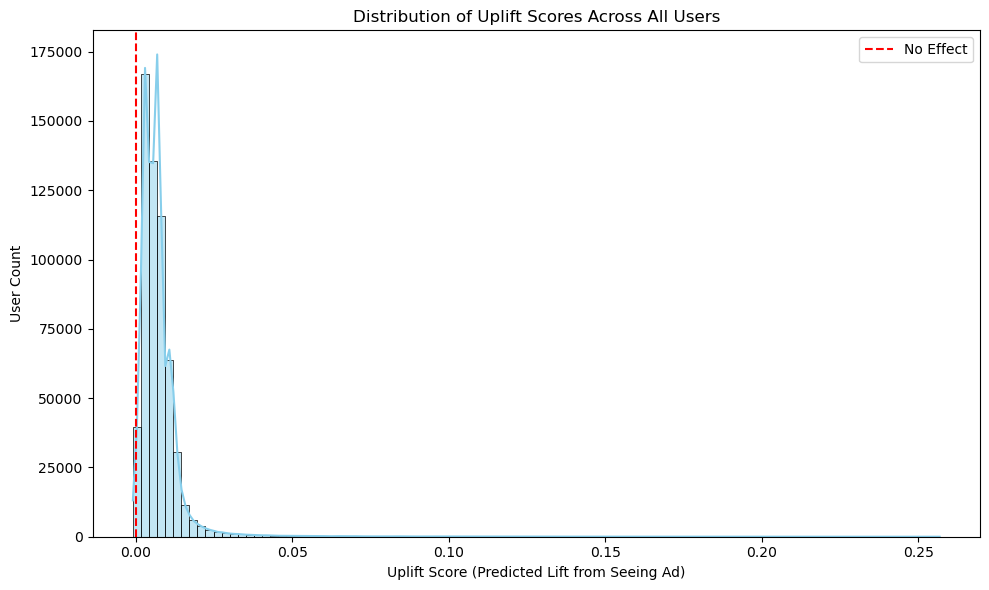

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 9.1: Visualize uplift score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_uplift['uplift_score'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Uplift Scores Across All Users')
plt.xlabel('Uplift Score (Predicted Lift from Seeing Ad)')
plt.ylabel('User Count')
plt.axvline(0, color='red', linestyle='--', label='No Effect')
plt.legend()
plt.tight_layout()
plt.show()

### User segments based on uplift modeling

In [32]:
import pandas as pd

# Load the dataset again
file_path = R"C:\Users\Ashok Kasaram\Downloads\marketing_AB.csv"
df = pd.read_csv(file_path)

# Clean and preprocess as before
df_clean = df.drop(columns=['Unnamed: 0'])
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(" ", "_")

# Create treatment flag
df_clean['treatment'] = (df_clean['test_group'] == 'ad').astype(int)

# Redefine target and features
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

X_raw = df_clean[['total_ads', 'most_ads_hour', 'most_ads_day']]
y = df_clean['converted'].astype(int)
treatment = df_clean['treatment']

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['total_ads', 'most_ads_hour']),
    ('cat', OneHotEncoder(drop='first'), ['most_ads_day'])
])

# Transform features
X = preprocessor.fit_transform(X_raw)

# Split by treatment
X_treat = X[treatment == 1]
y_treat = y[treatment == 1]
X_ctrl = X[treatment == 0]
y_ctrl = y[treatment == 0]

# Train models
model_treat = LogisticRegression(max_iter=1000)
model_ctrl = LogisticRegression(max_iter=1000)
model_treat.fit(X_treat, y_treat)
model_ctrl.fit(X_ctrl, y_ctrl)

# Predict uplift
p_treat = model_treat.predict_proba(X)[:, 1]
p_ctrl = model_ctrl.predict_proba(X)[:, 1]
uplift_scores = p_treat - p_ctrl

# Create new df for uplift analysis
df_uplift = df_clean.copy()
df_uplift['uplift_score'] = uplift_scores

# Categorize users
def categorize_uplift(row):
    if row['uplift_score'] > 0 and row['converted'] == 1:
        return 'Persuadable'
    elif row['uplift_score'] > 0 and row['converted'] == 0:
        return 'Potential Persuadable'
    elif row['uplift_score'] <= 0 and row['converted'] == 1:
        return 'Sure Thing'
    else:
        return 'Lost Cause / Do Not Disturb'

df_uplift['uplift_group'] = df_uplift.apply(categorize_uplift, axis=1)

# Count each category
uplift_summary = df_uplift['uplift_group'].value_counts().reset_index()
uplift_summary.columns = ['Uplift Group', 'User Count']

uplift_summary

,Uplift Group,User Count
0,Potential Persuadable,564544
1,Persuadable,14748
2,Lost Cause / Do Not Disturb,8714
3,Sure Thing,95


## Uplift Score Distribution & User Segmentation

To gain deeper strategic insight from uplift modeling, users were segmented based on their **causal response behavior** — not just whether they converted, but whether they converted because of the ad.

---

### Uplift Score Distribution

The distribution of uplift scores for all users is shown below:

![Uplift Score Distribution](attachment:cd1a349c-f729-4782-9aa0-abb3051fd81f.png)

- Most uplift scores are concentrated near **zero**, indicating **no meaningful response** to the ad for many users.
- A positive right tail reveals a subset of users who are **likely to have been influenced** by the ad.
- The red dashed line represents the **neutral threshold (zero effect)**.

---

### Uplift-Based User Segmentation

Users were categorized into four distinct behavioral groups based on uplift score and actual conversion status:

| Uplift Group                  | Description                                                                 |
|------------------------------|-----------------------------------------------------------------------------|
| 🟢 **Persuadable**            | Converted, and predicted to have done so **because of the ad**              |
| 🟡 **Potential Persuadable**  | Did not convert, but uplift score is positive — may respond if retargeted   |
| 🔴 **Lost Cause / Do Not Disturb** | Did not convert, and ad is predicted to have had **no or negative impact** |
| 🔵 **Sure Thing**            | Converted even without ad exposure — ad spend likely unnecessary            |

---

### Segment Breakdown

| Segment                    | User Count |
|----------------------------|------------|
| Potential Persuadable      | 564,544    |
| Persuadable                | 14,748     |
| Lost Cause / Do Not Disturb| 8,714      |
| Sure Thing                 | 95         |

---

### Insight

- **~97%** of users fall into the **Potential Persuadable** group, indicating a **huge opportunity** to increase ROI with refined targeting and creative strategies.
- **Persuadables** represent the **success profile** — ideal for lookalike modeling or tailored offers.
- **Sure Things** and **Do Not Disturb** segments offer clear paths for **budget optimization** by reducing unnecessary exposure.

This final segmentation transforms the experiment from a simple A/B test into an actionable **user-centric marketing strategy**.